# Regresia logistica

In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

https://archive.ics.uci.edu/dataset/43/haberman+s+survival

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [3]:
df = pd.read_csv(url, header = None)

In [4]:
df.columns =['age', 'year_operation', 'nr nodes', 'survival status'] 

In [5]:
df

,age,year_operation,nr nodes,survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [6]:
df
X_copy=df

In [7]:
X = df.drop(columns=['survival status'])
X

,age,year_operation,nr nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


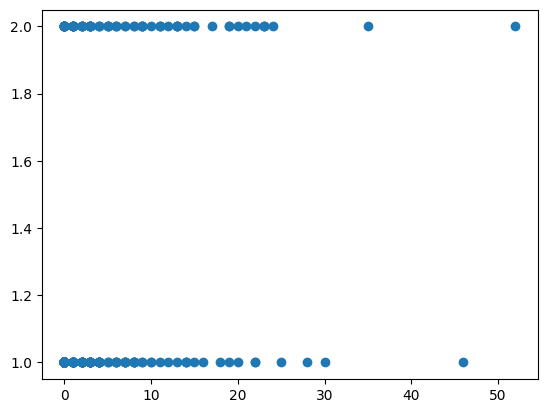

In [8]:
plt.scatter(df['nr nodes'], df['survival status'])
plt.show()

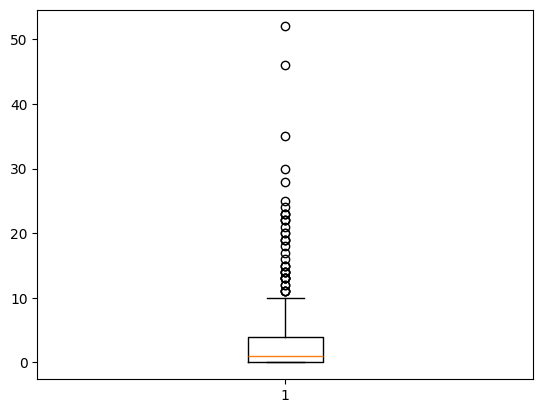

In [9]:
plt.boxplot(df['nr nodes'])
plt.show()

In [10]:
df['nr nodes'].max

<bound method Series.max of 0      1
1      3
2      0
3      2
4      4
      ..
301    1
302    0
303    3
304    1
305    2
Name: nr nodes, Length: 306, dtype: int64>

In [11]:
y = df['survival status']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   year_operation   306 non-null    int64
 2   nr nodes         306 non-null    int64
 3   survival status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

model = LogisticRegression( random_state = 0)
#model = RandomForestClassifier( random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
(y_pred!=y_test).sum()/y_test.size

0.3695652173913043

In [14]:
from sklearn.preprocessing import StandardScaler
model2 = StandardScaler()
model3 = StandardScaler()

In [21]:
model2.fit(X_train)
X_train_scaler = model2.transform(X_train)

model3.fit(X_test)
X_test_scaler = model3.transform(X_test)

model.fit(X_train_scaler,y_train)
y_pred = model.predict(X_test_scaler)
(y_pred!=y_test).sum()/y_test.size

0.358695652173913

In [22]:
from sklearn.preprocessing import Normalizer
model2 = Normalizer()
model3 = Normalizer()

In [23]:
model2.fit(X_train)
X_train_scaler2 = model2.transform(X_train)

model3.fit(X_test)
X_test_scaler2 = model2.transform(X_test)

model.fit(X_train_scaler2,y_train)
y_pred = model.predict(X_test_scaler2)
(y_pred!=y_test).sum()/y_test.size

0.3695652173913043

In [24]:
df_copy = df.drop(columns=['year_operation'])

In [25]:
from sklearn.preprocessing import MinMaxScaler
model2 = MinMaxScaler()
model3 = MinMaxScaler()

In [26]:
model2.fit(X_train)
X_train_scaler3 = model2.transform(X_train)

model3.fit_transform(X_test)
X_test_scaler3 = model3.transform(X_test)

model.fit(X_train_scaler3,y_train)
y_pred = model.predict(X_test_scaler3)
(y_pred!=y_test).sum()/y_test.size

0.358695652173913